## Least Squares moving average

Taken from Algovibes video [here](https://www.youtube.com/watch?v=sESQpRoo994)

In [127]:
# usual imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn linear regression
from sklearn.linear_model import LinearRegression

We will start by using Apple as an example

In [94]:
df = yf.download('AAPL', start='2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [95]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561531,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846367,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081490,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257111,132079200
...,...,...,...,...,...,...
2022-11-01,155.080002,155.449997,149.130005,150.649994,150.400497,80379300
2022-11-02,148.949997,152.169998,145.000000,145.029999,144.789810,93604600
2022-11-03,142.059998,142.800003,138.750000,138.880005,138.650009,97918500


In [105]:
# run regression for a single row
window = 25

# create a column that is the count of the row
df['Row Number'] = np.arange(len(df))

test_df = df[:window]

# define dependent and independent variables
y = test_df.Close

X = test_df['Row Number'].values

In [106]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [111]:
print(f"Coefficient: {model.coef_}")
print(f"Inercept: {model.intercept_}")

Coefficient: [0.21083853]
Inercept: 75.71403799203726


So now we have a line fit to the first 25 rows

We can use this line of best fit to predict a value for the following close

In [125]:
ex = df[window:window+1]['Row Number'].values.reshape(-1, 1)
model.predict(ex)

array([80.98500122])

### Rinse and repeat

As we move by day by day we will have a predicted value that we will 

We will work out the regression as we move our window forward

So the next regression we will increment the starting and ending value for Row Count

To do this we will construct a loop to do this for the whole time series 

In [131]:
lsma_arr = []
dates_arr = []

for i in range(window, len(df)):
    test_df = df[i-window:i]
    y = test_df.Close
    X = test_df['Row Number'].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    ex = df[i:i+1]['Row Number'].values.reshape(-1, 1)
    lsma_arr.append(model.predict(ex)[0])
    dates_arr.append(df[i:i+1].index[0])


In [137]:
len(lsma_arr)

694

In [139]:
lsma_df = pd.DataFrame({'LSMA': lsma_arr}, index=dates_arr)

In [140]:
lsma_df

,LSMA
2020-02-07,80.985001
2020-02-10,80.983051
2020-02-11,80.927001
2020-02-12,80.786375
2020-02-13,80.868100
...,...
2022-11-01,148.472103
2022-11-02,149.958902
2022-11-03,150.384801
2022-11-04,149.212402


We now wannt to combine both our LSMA and dataframes 

In [142]:
all_df = pd.concat([df, lsma_df], axis=1)

In [144]:
all_df.head(26)

,Open,High,Low,Close,Adj Close,Volume,Row Number,LSMA
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561531,135480400,0,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846367,146322800,1,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200,2,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081490,108872000,3,NaN
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257111,132079200,4,NaN
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.834389,170108400,5,NaN
2020-01-10,77.650002,78.167503,77.062500,77.582497,76.005829,140644800,6,NaN
2020-01-13,77.910004,79.267502,77.787498,79.239998,77.629639,121532000,7,NaN
2020-01-14,79.175003,79.392502,78.042503,78.169998,76.581398,161954400,8,NaN
2020-01-15,77.962502,78.875000,77.387497,77.834999,76.253197,121923600,9,NaN


## Now to create a strategy based on our ticker

In [146]:
all_df['signal_buy'] = all_df.Close < all_df.LSMA
all_df['signal_sell'] = all_df.Close > all_df.LSMA

In [148]:
# when we get a signal to buy, we buy the next day
# this is because we are using the close price 
# of the day to predict the next day's price
# this avoids lookahead bias

# to know what price we bought at, we need to shift the signal
# by one day
all_df['shifted_open'] = all_df.Open.shift(-1)

In [149]:
in_position = False

buydates,selldates=[],[]
buyprices,sellprices=[],[]

for index,row in all_df.iterrows():
    if row.signal_buy and not in_position:
        buydates.append(index)
        buyprices.append(row.shifted_open)
        in_position = True
    elif row.signal_sell and in_position:
        selldates.append(index)
        sellprices.append(row.shifted_open)
        in_position = False

In [150]:
buydates,selldates,buyprices,sellprices

([Timestamp('2020-02-07 00:00:00'),
  Timestamp('2020-02-18 00:00:00'),
  Timestamp('2020-02-20 00:00:00'),
  Timestamp('2020-03-03 00:00:00'),
  Timestamp('2020-03-09 00:00:00'),
  Timestamp('2020-03-11 00:00:00'),
  Timestamp('2020-03-16 00:00:00'),
  Timestamp('2020-04-20 00:00:00'),
  Timestamp('2020-05-01 00:00:00'),
  Timestamp('2020-05-13 00:00:00'),
  Timestamp('2020-05-19 00:00:00'),
  Timestamp('2020-05-21 00:00:00'),
  Timestamp('2020-06-11 00:00:00'),
  Timestamp('2020-06-19 00:00:00'),
  Timestamp('2020-06-24 00:00:00'),
  Timestamp('2020-06-26 00:00:00'),
  Timestamp('2020-07-07 00:00:00'),
  Timestamp('2020-07-13 00:00:00'),
  Timestamp('2020-07-16 00:00:00'),
  Timestamp('2020-07-21 00:00:00'),
  Timestamp('2020-08-17 00:00:00'),
  Timestamp('2020-08-27 00:00:00'),
  Timestamp('2020-09-02 00:00:00'),
  Timestamp('2020-10-16 00:00:00'),
  Timestamp('2020-11-20 00:00:00'),
  Timestamp('2020-12-09 00:00:00'),
  Timestamp('2020-12-11 00:00:00'),
  Timestamp('2020-12-30 00:0

In [152]:
# calculate profit
profits = pd.Series([(sell-buy)/buy for buy,sell in zip(buyprices,sellprices)])

In [154]:
(profits+1).prod()

1.9705231383066428

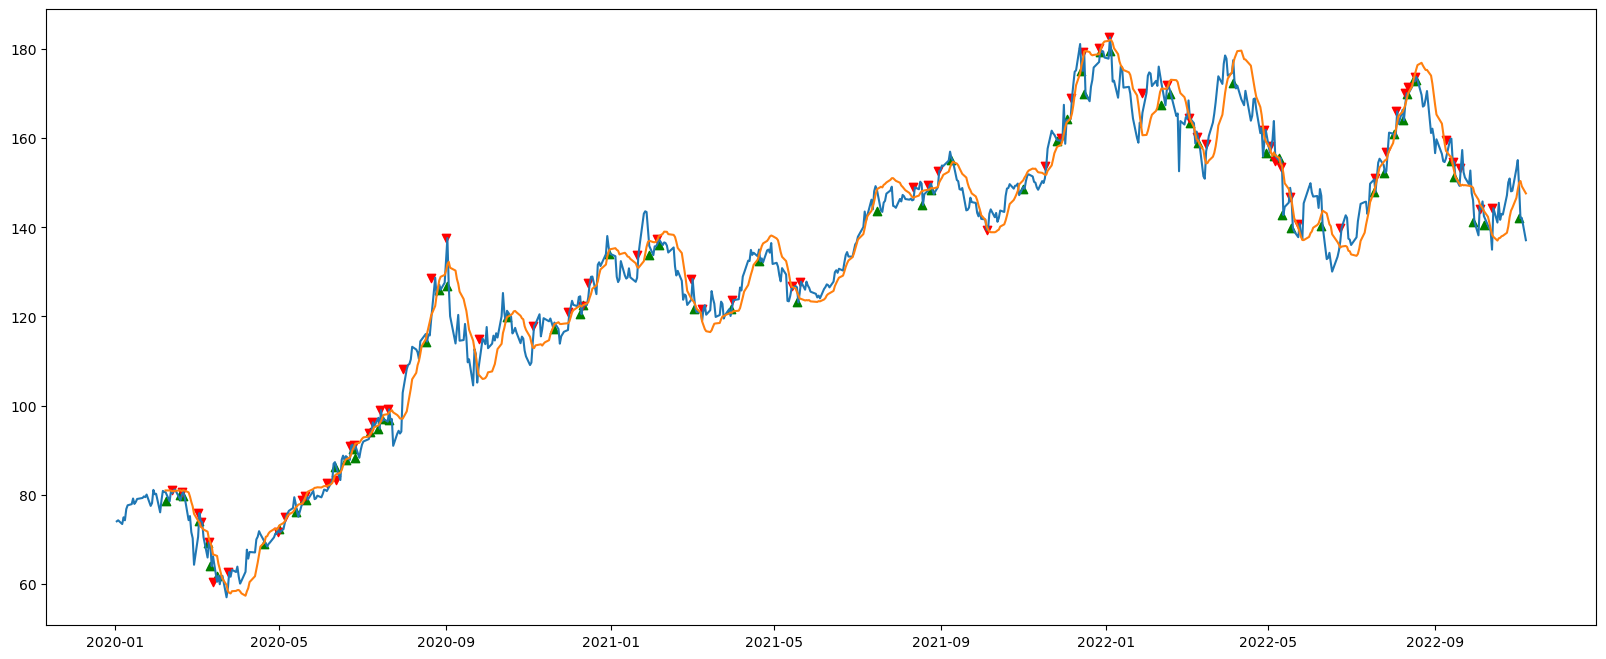

In [155]:
# (profits + 1).cumprod().plot()

plt.figure(figsize=(20,8))
plt.plot(all_df[['Open', 'LSMA']])
plt.scatter(buydates,  all_df.loc[buydates].shifted_open, marker='^', color='green')
plt.scatter(selldates, all_df.loc[selldates].shifted_open, marker='v', color='red')